<a href="https://colab.research.google.com/github/Sheila-RV/RojasSheila_SIS420/blob/main/PrimerParcial_SheilaRojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primer parcial **


Estudiante: Sheila Rojas Vasquez
Carnet: 35-5470
Dataset N° 62 del excel Fetal Health Classification
Link del dataset: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/**data**

El Estudio del Dataset Fetal Health Classification tiene el objetivo de Clasificar la salud fetal para prevenir la mortalidad infantil y materna.
Los cardiotocogramas (CTG) son una opción sencilla y económica para evaluar la salud fetal, lo que permite a los profesionales sanitarios tomar medidas para prevenir la mortalidad infantil y materna. El equipo en sí funciona enviando pulsos de ultrasonido y leyendo su respuesta, arrojando así luz sobre la frecuencia cardíaca fetal (FCF), los movimientos fetales, las contracciones uterinas y más.


Datos: Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de cardiotocograma, que luego fueron clasificados por tres obstetras expertos en 3 clases: Normal,Sospechoso,Patológico

#Imports




In [65]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize

%matplotlib inline

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importar Dataset

In [67]:
#Lectura de archivo con pandas
df_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/fetal_health.csv')

In [68]:
df_.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [69]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

#1.  Insertar atributos

In [70]:
#Asignar aleatoriamente una grupo de edad (a para 15 a 25)(b para 25 a 35)(c para 35 a 45)
# Asignar aleatoriamente los grupos de edad sin depender de una columna de edad
df_['age_group'] = np.random.choice(['a', 'b', 'c'], size=len(df_))

# Mostrar las primeras filas
print(df_.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

In [71]:
#Asignar el nombre del doctor responsable de la atencion
df_['DoctorResp'] = np.random.choice(['Diego Fernandez', 'Mauricio Zeballos', 'Daniela Nieves'], size=len(df_))

In [72]:
print(df_.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

In [73]:
#Agregar una columna de seguimiento True=1  si es sospechosos o patologico y False =0 si es normal
df_['Seguimiento'] = df_['fetal_health'].apply(lambda x: 0 if x == 1 else 1)

In [74]:
df_.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,age_group,DoctorResp,Seguimiento
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,0.0,120.0,137.0,121.0,73.0,1.0,2.0,b,Diego Fernandez,1
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,1.0,141.0,136.0,140.0,12.0,0.0,1.0,b,Diego Fernandez,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,1.0,141.0,135.0,138.0,13.0,0.0,1.0,a,Daniela Nieves,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,0.0,137.0,134.0,137.0,13.0,1.0,1.0,c,Daniela Nieves,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,0.0,137.0,136.0,138.0,11.0,1.0,1.0,a,Diego Fernandez,0


#2. Duplicar los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia

In [75]:
df_sint=df_.copy()
# Identificar las columnas numéricas, excluyendo 'fetal_health'
numeric_columns = df_sint.select_dtypes(include=[np.number]).columns.difference(['fetal_health','Seguimiento'])

# Función para variar los valores numéricos en un rango pequeño
def add_random_variation(value):
    variation = np.random.uniform(0.0001, 0.0005)  # Variación aleatoria entre -0.05 y 0.05
    return value + variation

# Aplicar la variación solo a las columnas numéricas, excepto 'fetal_health'
df_sint[numeric_columns] = df_sint[numeric_columns].applymap(add_random_variation)

# Mostrar el nuevo dataset con las variaciones aplicadas
print(df_sint)

<ipython-input-75-2417fc1ad4ea>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_sint[numeric_columns] = df_sint[numeric_columns].applymap(add_random_variation)


      baseline value  accelerations  fetal_movement  uterine_contractions  \
0         120.000292       0.000192        0.000200              0.000189   
1         132.000421       0.006154        0.000233              0.006203   
2         133.000385       0.003278        0.000347              0.008138   
3         134.000461       0.003155        0.000206              0.008182   
4         132.000469       0.007246        0.000124              0.008161   
...              ...            ...             ...                   ...   
2121      140.000457       0.000447        0.000276              0.007124   
2122      140.000160       0.001295        0.000273              0.007430   
2123      140.000256       0.001419        0.000235              0.007306   
2124      140.000121       0.001475        0.000398              0.006356   
2125      142.000491       0.002110        0.002129              0.008413   

      light_decelerations  severe_decelerations  prolongued_decelerations  

In [76]:
df_sint.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,age_group,DoctorResp,Seguimiento
0,120.000292,0.000192,0.000200,0.000189,0.000126,0.000251,0.000246,73.000490,0.500407,43.000231,...,0.000309,120.000263,137.000340,121.000264,73.000450,1.000368,2.0,b,Diego Fernandez,1
1,132.000421,0.006154,0.000233,0.006203,0.003285,0.000386,0.000456,17.000387,2.100330,0.000209,...,1.000317,141.000279,136.000379,140.000350,12.000333,0.000256,1.0,b,Diego Fernandez,0
2,133.000385,0.003278,0.000347,0.008138,0.003174,0.000391,0.000262,16.000462,2.100110,0.000418,...,1.000384,141.000327,135.000240,138.000411,13.000129,0.000376,1.0,a,Daniela Nieves,0
3,134.000461,0.003155,0.000206,0.008182,0.003187,0.000302,0.000135,16.000338,2.400255,0.000151,...,0.000314,137.000499,134.000209,137.000317,13.000406,1.000194,1.0,c,Daniela Nieves,0
4,132.000469,0.007246,0.000124,0.008161,0.000277,0.000196,0.000148,16.000259,2.400267,0.000483,...,0.000422,137.000483,136.000189,138.000235,11.000451,1.000451,1.0,a,Diego Fernandez,0


In [77]:
df_.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,age_group,DoctorResp,Seguimiento
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,0.0,120.0,137.0,121.0,73.0,1.0,2.0,b,Diego Fernandez,1
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,1.0,141.0,136.0,140.0,12.0,0.0,1.0,b,Diego Fernandez,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,1.0,141.0,135.0,138.0,13.0,0.0,1.0,a,Daniela Nieves,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,0.0,137.0,134.0,137.0,13.0,1.0,1.0,c,Daniela Nieves,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,0.0,137.0,136.0,138.0,11.0,1.0,1.0,a,Diego Fernandez,0


#3. Grafica representativa del dataset inicial y sintetico

In [78]:
#Preparamos datos
x_real=df_['accelerations']
y_real=df_['fetal_movement']
fetal_health_real=df_['fetal_health']

x_sint=df_sint['accelerations']
y_sint=df_sint['fetal_movement']
fetal_health_sint=df_sint['fetal_health']

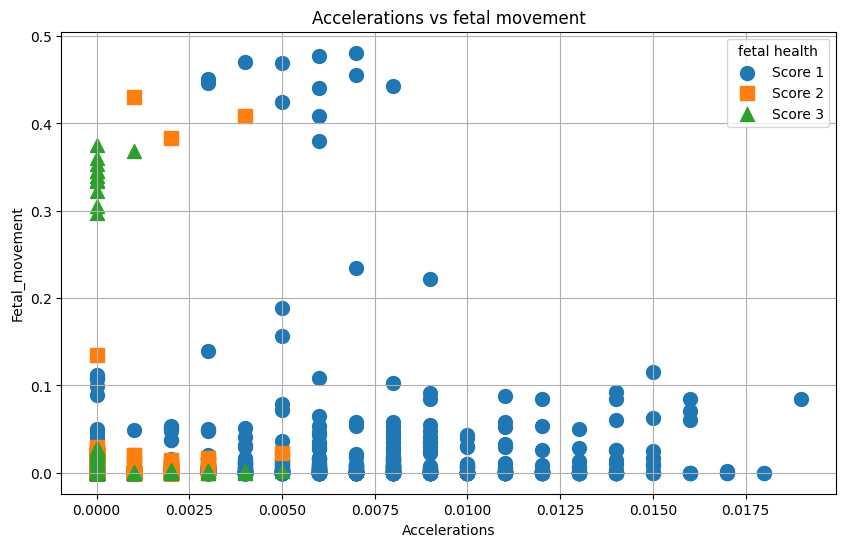

In [136]:
# Mapa de formas para los diferentes valores de Credit_Score
marker_styles = {1: 'o', 2: 's', 3: '^'}

# Crear una figura y un eje
plt.figure(figsize=(10, 6))

# Graficar cada grupo con una forma distinta
for score, marker in marker_styles.items():
    # Seleccionar los datos para el score actual
    mask = fetal_health_real == score
    plt.scatter(x_real[mask], y_real[mask], marker=marker, label=f'Score {score}', s=100)

# Añadir etiquetas y título
plt.xlabel('Accelerations')
plt.ylabel('Fetal_movement')
plt.title('Accelerations vs fetal movement')
plt.legend(title='fetal health')
plt.grid(True)

# Mostrar la gráfica
plt.show()

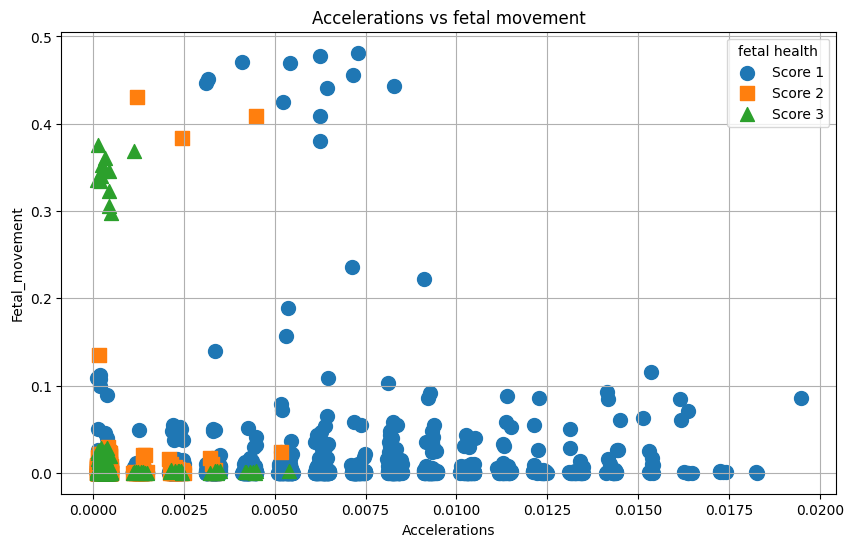

In [137]:
# Mapa de formas para los diferentes valores de Credit_Score
marker_styles = {1: 'o', 2: 's', 3: '^'}

# Crear una figura y un eje
plt.figure(figsize=(10, 6))

# Graficar cada grupo con una forma distinta
for score, marker in marker_styles.items():
    # Seleccionar los datos para el score actual
    mask = fetal_health_sint == score
    plt.scatter(x_sint[mask], y_sint[mask], marker=marker, label=f'Score {score}', s=100)

# Añadir etiquetas y título
plt.xlabel('Accelerations')
plt.ylabel('Fetal_movement')
plt.title('Accelerations vs fetal movement')
plt.legend(title='fetal health')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [81]:
#Unir dataset inicial con dataset sintetico
df_union=pd.concat([df_,df_sint],axis=0)
df_union.shape

(4252, 25)

#Dividir los datos del datset sintetico en datos de entrenamiento y prueba

In [82]:
#Se mezclan los datos
df_new=df_union.copy()
df_new_m = df_new.sample(frac=1, random_state=42).reset_index(drop=True)

In [83]:
#Calculamos el tamaño del conjunto de entrenamiento
train_size=int(0.8*len(df_new_m))
train_size

3401

In [84]:
train_data=df_new_m[:train_size]
test_data=df_new_m[train_size:]
print("Entrenamiento", train_data)
print("Prueba", test_data)

Entrenamiento       baseline value  accelerations  fetal_movement  uterine_contractions  \
0         132.000000       0.013000        0.000000              0.003000   
1         135.000435       0.000182        0.003498              0.000354   
2         135.000124       0.002227        0.000116              0.000145   
3         134.000407       0.011468        0.000446              0.010319   
4         136.000000       0.000000        0.000000              0.008000   
...              ...            ...             ...                   ...   
3396      140.000263       0.002185        0.001303              0.008298   
3397      135.000000       0.004000        0.003000              0.000000   
3398      148.000000       0.004000        0.000000              0.005000   
3399      132.000000       0.003000        0.005000              0.006000   
3400      142.000234       0.000157        0.000108              0.009459   

      light_decelerations  severe_decelerations  prolongued_d

In [85]:
#Separamos features x de la variable objetivo
X_train = train_data.drop(['fetal_health','age_group', 'DoctorResp'], axis=1)
y_train = train_data['fetal_health']

X_test = test_data.drop(['fetal_health','age_group', 'DoctorResp'], axis=1)
y_test = test_data['fetal_health']

In [86]:
X_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,Seguimiento
0,132.000000,0.013000,0.000000,0.003000,0.003000,0.000000,0.000000,31.000000,4.800000,0.000000,...,52.000000,199.000000,9.000000,1.000000,133.000000,154.000000,163.000000,137.000000,1.000000,0
1,135.000435,0.000182,0.003498,0.000354,0.000185,0.000197,0.000460,59.000397,0.500348,16.000128,...,113.000242,153.000208,4.000265,0.000257,139.000249,139.000401,140.000163,1.000194,0.000331,0
2,135.000124,0.002227,0.000116,0.000145,0.000298,0.000242,0.000442,63.000334,0.500261,8.000247,...,133.000224,166.000333,1.000282,0.000171,141.000327,142.000277,143.000357,1.000425,-0.999891,1
3,134.000407,0.011468,0.000446,0.010319,0.004147,0.000302,0.000408,56.000378,1.400494,0.000153,...,86.000392,187.000146,5.000174,0.000158,151.000430,152.000480,160.000101,44.000214,1.000216,0
4,136.000000,0.000000,0.000000,0.008000,0.005000,0.000000,0.000000,33.000000,1.200000,0.000000,...,61.000000,152.000000,5.000000,0.000000,136.000000,132.000000,137.000000,17.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,140.000263,0.002185,0.001303,0.008298,0.004476,0.000210,0.000467,63.000119,1.400322,0.000165,...,93.000420,163.000181,7.000180,0.000424,142.000479,134.000176,141.000270,22.000156,1.000337,0
3397,135.000000,0.004000,0.003000,0.000000,0.000000,0.000000,0.000000,59.000000,0.500000,13.000000,...,70.000000,165.000000,5.000000,0.000000,142.000000,141.000000,143.000000,2.000000,1.000000,0
3398,148.000000,0.004000,0.000000,0.005000,0.000000,0.000000,0.000000,36.000000,0.800000,8.000000,...,135.000000,180.000000,3.000000,0.000000,157.000000,157.000000,158.000000,3.000000,0.000000,0
3399,132.000000,0.003000,0.005000,0.006000,0.000000,0.000000,0.000000,58.000000,0.500000,23.000000,...,120.000000,156.000000,2.000000,0.000000,133.000000,135.000000,134.000000,3.000000,0.000000,0


In [87]:
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

In [88]:

y_train=y_train.ravel()
y_test=y_test.ravel()

In [89]:
X_train

array([[ 1.32000000e+02,  1.30000000e-02,  0.00000000e+00, ...,
         1.37000000e+02,  1.00000000e+00,  0.00000000e+00],
       [ 1.35000435e+02,  1.81619440e-04,  3.49778206e-03, ...,
         1.00019429e+00,  3.31013612e-04,  0.00000000e+00],
       [ 1.35000124e+02,  2.22703804e-03,  1.15787777e-04, ...,
         1.00042491e+00, -9.99890883e-01,  1.00000000e+00],
       ...,
       [ 1.48000000e+02,  4.00000000e-03,  0.00000000e+00, ...,
         3.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.32000000e+02,  3.00000000e-03,  5.00000000e-03, ...,
         3.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.42000234e+02,  1.56686567e-04,  1.08349904e-04, ...,
         8.70003159e+01,  1.00046495e+00,  0.00000000e+00]])

#Entrenamiento de modelo de regresión logística binario por cada clase

Regresión logística binaria para clase 1: Poor

In [91]:
#Para la clase 1 todas las demás clases 2 y 3 son 0
y_train_binary=np.where(y_train==1,1,0)
y_test_binary=np.where(y_test==1,1,0)


In [92]:
y_train_binary

array([1, 1, 0, ..., 1, 1, 1])

Normalización de features

In [93]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [94]:
X_norm, mu, sigma = featureNormalize(X_train)

Regresión logística

In [95]:
#función de activación sigmoide
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [96]:
X_train.shape

(3401, 22)

In [97]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
# Agraga el termino de intercepción a A
X_train = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [98]:
#Funcion de costo
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
   #h = np.clip(h, 1e-10, 1 - 1e-10)
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [99]:
#Funcion Descenso por el Gradiente
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 1.23419833e+00 -2.13011613e-01  2.54667578e-01 -5.42747497e-02
  2.19308155e-01  2.64533793e-02 -1.24752719e-03 -3.37702319e-01
 -3.30422982e-01  7.05001883e-02 -3.56060296e-01  4.91534239e-02
  9.66736878e-03 -5.09218805e-02 -6.31713665e-02 -3.13592281e-02
 -1.64687502e-02  9.65218373e-02  3.96116202e-02  5.04580526e-02
 -1.71089743e-01  1.28016549e-02 -1.46533380e+00]


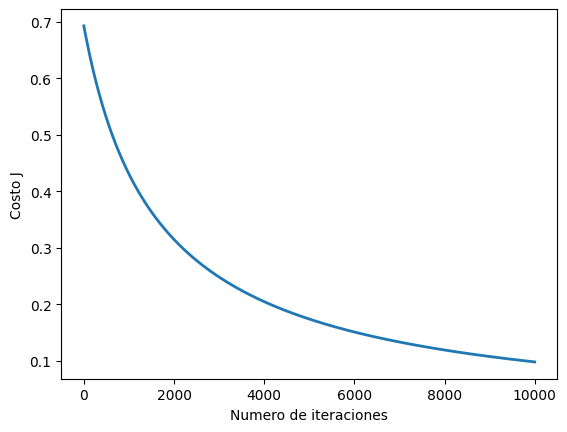

In [100]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(23)
theta, J_history = descensoGradiente(theta, X_train, y_train_binary, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [101]:
J_history[-1]

0.09839988913198897

PRecisión del modelo dataset de train

In [102]:
print(X_test)
print(theta)

[[1.34000378e+02 5.28380964e-03 4.69035837e-04 ... 2.20001958e+01
  1.00011719e+00 0.00000000e+00]
 [1.28000000e+02 0.00000000e+00 0.00000000e+00 ... 1.28000000e+02
  0.00000000e+00 1.00000000e+00]
 [1.39000000e+02 1.30000000e-02 0.00000000e+00 ... 2.50000000e+01
  1.00000000e+00 0.00000000e+00]
 ...
 [1.33000389e+02 5.44124475e-03 2.56003491e-04 ... 2.20003233e+01
  1.00026382e+00 0.00000000e+00]
 [1.30000339e+02 8.33069879e-03 1.32017924e-03 ... 4.80004045e+01
  2.28612722e-04 0.00000000e+00]
 [1.42000000e+02 1.00000000e-03 0.00000000e+00 ... 4.00000000e+00
  1.00000000e+00 0.00000000e+00]]
[ 1.23419833e+00 -2.13011613e-01  2.54667578e-01 -5.42747497e-02
  2.19308155e-01  2.64533793e-02 -1.24752719e-03 -3.37702319e-01
 -3.30422982e-01  7.05001883e-02 -3.56060296e-01  4.91534239e-02
  9.66736878e-03 -5.09218805e-02 -6.31713665e-02 -3.13592281e-02
 -1.64687502e-02  9.65218373e-02  3.96116202e-02  5.04580526e-02
 -1.71089743e-01  1.28016549e-02 -1.46533380e+00]


In [103]:
#Normalización de datos de tests
X_test_norm, mu, sigma = featureNormalize(X_test)
m, n = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)
#aprueba = sigmoid(np.dot(X_test_norm, theta))   # Se debe cambiar esto
#print(aprueba)

In [104]:
def predict(theta, X):

    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [105]:
p = predict(theta, X_test_norm)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_test_binary) * 100))
#print('Precisión esperada (aproximadamente): 89.00 %')

Precisión de entrenamiento: 100.00 %


#Regresión logística para clase 2

In [106]:
#Para la clase 2 todas las demás clases 1 y 3 son 0
y_train_binary2=np.where(y_train==2,1,0)
y_test_binary2=np.where(y_test==2,1,0)


theta calculado por el descenso por el gradiente: [-1.62811036e+00  1.02067044e-01 -2.28947857e-01  1.03855453e-03
 -1.16717650e-01 -3.87848127e-02  6.71227663e-03 -7.94371757e-02
  7.41341333e-02 -8.09216112e-02  8.75719790e-02  7.89438753e-02
 -1.00133024e-02  5.55825810e-02  7.01203864e-02  9.21500892e-02
  1.95483768e-02  1.21277747e-01  1.44857600e-01  1.22912488e-01
 -4.70210714e-02  4.83516491e-02  9.78156214e-01]


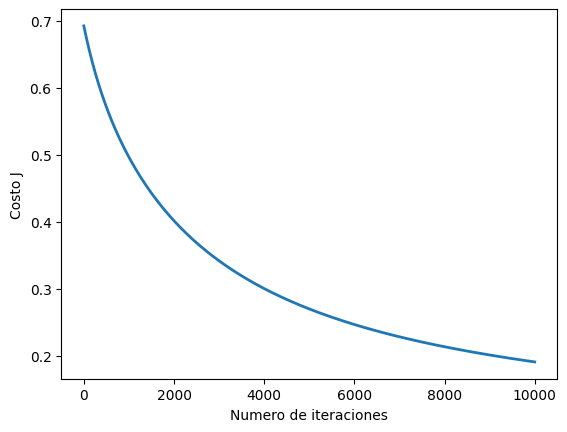

In [107]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(23)
theta, J_history = descensoGradiente(theta, X_train, y_train_binary2, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [108]:
J_history[-1]

0.19062347809958521

In [109]:
p = predict(theta, X_test_norm)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_test_binary2) * 100))


Precisión de entrenamiento: 96.47 %


#Regresion logística para la Clase 3

In [110]:
#Para la clase 3 todas las demás clases 1 y 2 son 0
y_train_binary3=np.where(y_train==3,1,0)
y_test_binary3=np.where(y_test==3,1,0)


theta calculado por el descenso por el gradiente: [-1.95674139  0.08715438 -0.26567151 -0.00570078 -0.11091303 -0.04646683
  0.00995502 -0.11811697  0.04212086 -0.08773127  0.02978736  0.09983615
 -0.00750803  0.06145125  0.08524516  0.12011248  0.01778765  0.14758983
  0.17971421  0.14745271 -0.06418094  0.05356502  1.20154448]


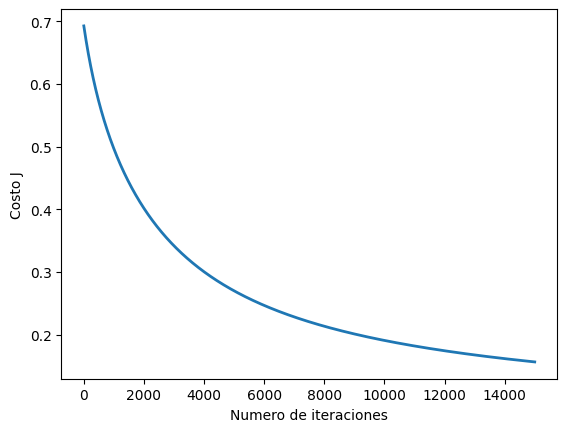

In [111]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 15000
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(23)
theta, J_history = descensoGradiente(theta, X_train, y_train_binary2, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [112]:
J_history[-1]

0.15633176065696974

In [113]:
p = predict(theta, X_test_norm)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_test_binary3) * 100))


Precisión de entrenamiento: 81.79 %


# 6. Entrenar un modelo de One Vs All

In [130]:
input_layer_size  = 22  # 21 input nodes + 1 extra bias input
num_labels = 3

In [131]:

def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    temp = theta.copy()
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    #Matriz para almacenar los pesos 3 filas/clase
    all_theta = np.zeros((num_labels, n + 1))

    # Lista para almacenar las funciones de costo e iteraciones
    cost_history = []
    iterations_history = []

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        # Inicializa los parametros theta para la clase actual c
        initial_theta = np.zeros(n + 1)
        # Lista para almacenar el costo para cada iteración
        cost_for_class = []
        # Función de callback para la optimización
        def callback_function(theta):
            # Calcula el costo con los valores actuales de theta y lo almacena
            J, _ = lrCostFunction(theta, X, (y == c), lambda_)
            cost_for_class.append(J)

        #El optimizador debe realizar un maximo de 50 iteraciones durante el ajuste de los parametros
        options = {'maxiter': 50}

        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                #optimizacion por conjugada de gradiente
                                method='CG',
                                options=options,

                                callback=callback_function)


        all_theta[c] = res.x
        cost_history.append(cost_for_class)
        iterations_history.append(len(cost_for_class))  # Número de iteraciones

    return all_theta, cost_history, iterations_history


#####


# Entrena el modelo
lambda_ = 0.1 #Parámetro de regularización para evitar sobreajuste
all_theta, cost_history, iterations_history = oneVsAll(X_train, y_train, num_labels, lambda_)
print(all_theta.shape)


(3, 24)


In [132]:
print(all_theta)

[[-1.22070418e+01  8.79672748e-02 -1.72721917e-12 -1.71503562e-14
   4.23513755e-13  7.60693070e-13  1.75019978e-12  2.54359646e-13
   1.34806739e-12 -8.17414499e-13  1.85250748e-12 -1.22934559e-12
  -1.09192644e-13  1.66461200e-12 -1.95466018e-12  3.78623821e-13
   1.28934969e-12  6.42071651e-13 -2.04380419e-12 -2.29478613e-12
  -2.14478432e-12  1.70294535e-12 -6.69201385e-13 -2.57853833e-13]
 [ 5.62000761e+00  1.91292380e-01 -3.48494093e-01  7.90355650e-01
  -7.92173937e-02  2.87647352e-01  5.44475266e-02  1.45490823e-02
  -5.02125717e-01 -5.65549800e-01  2.01528384e-01 -3.07025810e-01
  -5.30267665e-02  4.04366031e-02 -1.84069395e-01 -2.16447244e-01
  -8.79934948e-02 -6.89168201e-03  2.19890775e-01 -5.46797728e-02
   7.46788956e-02 -3.58758510e-01 -4.16330732e-02 -6.42456680e+00]
 [-4.62993465e+00 -4.16318113e+00 -1.74942307e+00 -4.95544749e-01
  -5.28904255e-01 -2.17187765e-01 -2.73292575e-01 -1.15928026e-01
  -4.49175862e-01 -1.98447219e+00  3.32244901e-01 -9.20038539e-01
   1.092

In [133]:
def predictOneVsAll(all_theta, X):


    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [134]:
print(X_test_norm.shape)
pred = predictOneVsAll(all_theta, X_test_norm)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_test) * 100))


(851, 23)
Precision del conjuto de entrenamiento: 90.95%


# Graficas de costo y precision de los modelos

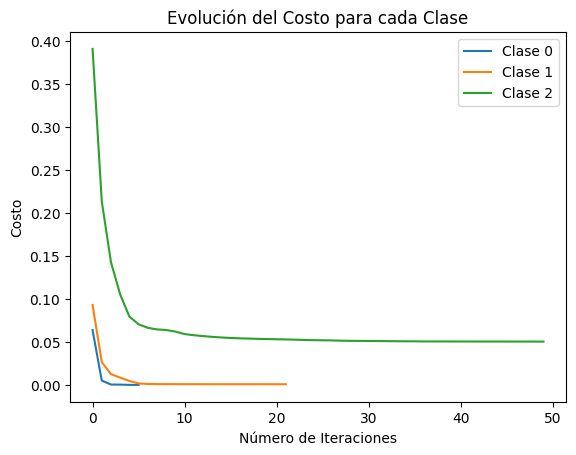

In [135]:
# Graficar el costo por clase
for i in range(num_labels):
    plt.plot(range(iterations_history[i]), cost_history[i], label=f'Clase {i}')

plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo')
plt.title('Evolución del Costo para cada Clase')
plt.legend()
plt.show()